# Linear Regression in ML ( Supervised ML algorithm Regression) (quan hẹ tuyến tính)
It assumes that there is a linear relationship between the input and ouput, meaning the output changes at a constant rate as the input changes, this relationsip is represented by a straight line.

## Why linear Regression is Important ?
- Simplicity and Interpretablility
- Predict ability
- Basis for other Models
- Efficiency
- Widely Used
- Analysis
## Example
- dự đoán giá nhà dựa trên diện tích
- dự đoán giá nhà dựa trên chi phí quảng cáo
- dự đoán tiền lương dựa trên số năm kinh nghiệm
# Syntax y = wx + b (y là output, x là input)
-  hàm mất mát (MSE: Mean Squared Error)

# hàm liên tục nhiều biến
y = w0 + w1.x1 + w2.x2 + ... + wN.xN

# hàm mất mát là sai số giữa giá trị dự đoán và giá trị thật nhỏ nhất
MSE = 1/n * (yi - yi^)2

w1 (slope): 4.999999999999999
w0 (intercept):  -99.99999999999994


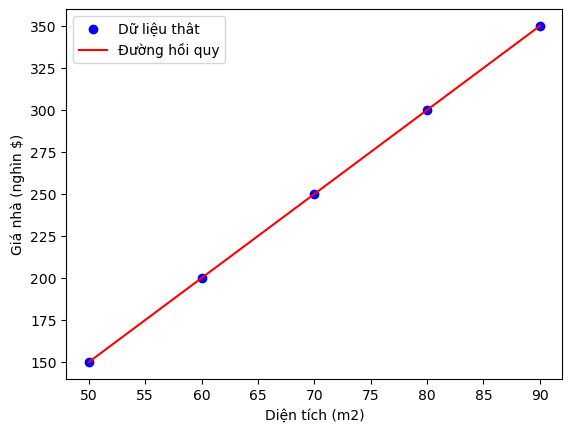

In [1]:
# code dự đoán giá nhà theo diện tích

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# dữ liuje ban đầu
X = np.array([[50], [60], [70], [80], [90]])  # diện tích
y = np.array([150, 200, 250, 300, 350])      # giá nhà
# tạo model 
model = LinearRegression()
# fit dùng để tính ra các hệ số w intercept b sao cho mô hình dự đoán tốt
# huấn luyện
model.fit(X, y)
# hệ số
print("w1 (slope):", model.coef_[0]) # hiểu là a độ dốc trong y = ax + b
print('w0 (intercept): ', model.intercept_) # hiểu là b chặn trong y = ax + b

# vẽ biểu đồ
plt.scatter(X, y, color = 'blue', label = "Dữ liệu thât")
plt.plot(X, model.predict(X), color="red", label="Đường hồi quy")
plt.xlabel("Diện tích (m2)")
plt.ylabel("Giá nhà (nghìn $)")
plt.legend()
plt.show()

# Simple Linear Regression
This Notebook is devided into 3 parts:

1. Building Linear Regression Model using Sklearn
2. Building the model like a Pro using sklearn
3. Model Building using statsmodels
4. 

# Building Linear Regression Model using sklearn
below mentioned are the steps to be followed

1. Load the data
2. Data preparation - train-test split, Normlisation or Rescaling
3. Training the Model
4. Prediction
5. Evaluation

## 1 Load The Data


In [2]:
df = pd.read_csv("D:/Project Python AI/Machine Learning/Supervisor/Regression and Classification Algorithms/Linear Regression/Data/student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

## 2. Data Preparation 

In [4]:
target =  df['Scores']
data = df[['Hours']]
data

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [5]:
target

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.7, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7, 1) (7,)
(18, 1) (18,)


In [11]:
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [10]:
X_train.head()


,Hours
7,5.5
20,2.7
3,8.5
0,2.5
21,4.8


## 3. Training the model


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # tìm a, b độ dốc và chặn


LinearRegression()

In [14]:
print("Intercept(chặn): ", regressor.intercept_)
print("slope(dốc):", regressor.coef_)

Intercept(chặn):  1.0979263522987566
slope(dốc): [9.8479817]


## 4. Prediction 


In [18]:
y_test_pred = regressor.predict(X_test)



In [19]:
temp_df = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred})

temp_df

,Actual,Predicted
5,20,15.869899
2,27,32.611468
19,69,73.972991
16,30,25.717881
11,62,59.201018
22,35,38.520257
17,24,19.809092
24,86,77.912184
23,76,69.049000
14,17,11.930706


<Axes: xlabel='Scores', ylabel='Count'>

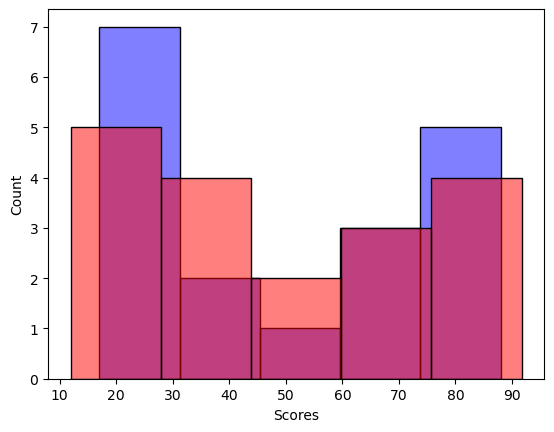

In [23]:
import seaborn as sns

sns.histplot(y_test, color = 'blue', alpha = 0.5, bins = 5)
sns.histplot(y_test_pred, color='red', alpha=0.5, bins=5)

<Axes: ylabel='Count'>

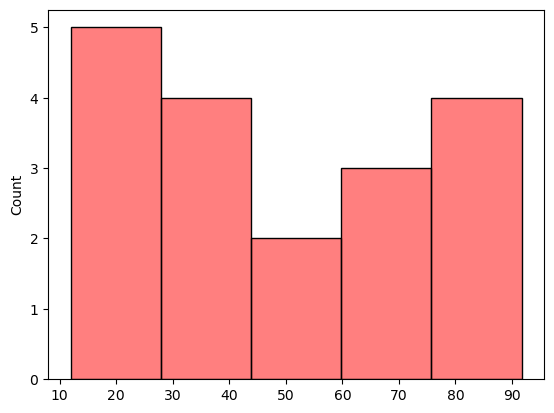

In [22]:
sns.histplot(y_test_pred, color='red', alpha=0.5, bins=5)

## 5. Evaluation


In [24]:
from sklearn import metrics

print("Root mean squared Error(MSE):", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root mean squared Error(MSE): 5.336173756108544


In [26]:
print(metrics.r2_score(y_test, y_test_pred))
# trả về R^2 
# = 1 là hoàn# 
# R^2 = 0.954 nghĩa là mô hình giải thích được 95,4% phương sai của dữ liệu thực


0.9546671754868552


# Building the model like a Pro using sklearn
below mentioned are the steps to be followed:

1. Load the data
2. Understand and Visulization the data
3. Data Preparation - train - test - split, Normalization or Rescaling
4. Training the Model
5. Residual Analysis on Training Data
6. Prediction
7. Evaluation


## 1. Loading the Data


In [27]:
df = pd.read_csv("D:/Project Python AI/Machine Learning/Supervisor/Regression and Classification Algorithms/Linear Regression/Data/student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [28]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [29]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

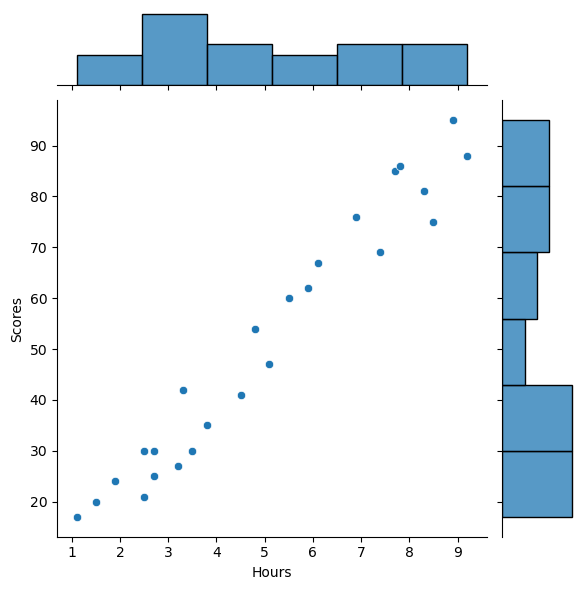

In [30]:
sns.jointplot(x = "Hours", y = "Scores", data = df, kind = "scatter")

In [32]:
df.corr() # hệ số tương quan
# +1 là tương quan thuận hoàn hảo( biến A tăng thì biến B tăng tỉ lệ thuận)
# -1 là tương quan nghịch hoàn hảo( biến A tăng thì B giảm)
# 0 là không có mỗi liên hệ tuyến tính rõ ràng

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

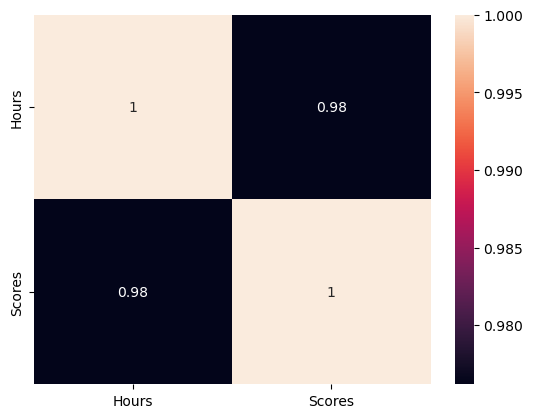

In [35]:
plt.figure()
sns.heatmap(df.corr(), annot = True) # annot là hiện chỉ số trên ô

## 3. Data Preparation
1. Splitting df into train and test
2. Rescaling the variables( Normalisation or Standardisation)
- interpretability
- Model trains fast

In [37]:
X = df[['Hours']]
y = df['Scores']

In [38]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.shape)
print(X_test.shape)

(17, 1)
(8, 1)


In [39]:
X_train.head()

,Hours
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3


## 4. Training 


In [40]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [41]:
print('y intercept: ',regressor.intercept_)

y intercept:  2.370815382341881


In [42]:

print('slope: ',regressor.coef_)

slope:  [9.78856669]


In [43]:
y_train_pred = regressor.predict(X_train)

In [1]:
plt.scatter(X_train['Hours'], y_train)

plt.plot(X_train['Hours'], y_train_pred, 'r')

plt.show()

NameError: name 'plt' is not defined

In [3]:
pip install google-generativeai

INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.3 MB 882.6 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.1 MB 1.4 MB/s eta 0:00:10
   -- ------------------------------------- 

In [4]:
import google.generativeai as genai

In [5]:
f = open("keys/.gemini.txt")
key = f.read()

genai.configure(api_key=key)

FileNotFoundError: [Errno 2] No such file or directory: 'keys/.gemini.txt'

In [ ]:
print("Thanh tân")

In [6]:
pip install mediapipe


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.



  Using cached sounddevice-0.5.2-py3-none-win_amd64.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/51.0 MB ? eta -:--:--
   - -------------------------------------- 2.4/51.0 MB 9.0 MB/s eta 0:00:06
   --- ------------------------------------ 4.5/51.0 MB 10.0 MB/s eta 0:00:05
   ---- ----------------------------------- 5.5/51.0 MB 7.8 MB/s eta 0:00:06
   ------ --------------------------------- 8.9/51.0 MB 9.7 MB/s eta 0:00:05
   -------- ------------------------------- 10.7/51.0 MB 9.5 MB/s eta 0:00:05
   ---------- ----------------------------- 13.1/51.0 MB 9.9 MB/s eta 0:00:04
   ------------ --------------------------- 15.5/51.0 MB 10.1 MB/s eta 0:00:04
   -------------- ------------------------- 18.1/51.0 MB 10.4 MB/s eta 0:00:04
   -